In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import vmap, jit
import jax.numpy as jnp
from pathlib import Path
import numpy as np
from einops import rearrange
import jax
import matplotlib.pyplot as plt
import seaborn as sns
from hflow.misc.plot import scatter_movie, imshow_movie, line_movie
import random

In [46]:
from hflow.truth.sburgers import solve_sburgers,solve_sburgers_samples

In [43]:
key = jax.random.PRNGKey(random.randint(0,1e6))
N = 128
dt = 1e-3
nu = 2e-3
Tend = 10.0
A = 0.0
B = 1.0
X = np.linspace(A, B, N)
period = [B-A, Tend]
def ic_0(x): return jnp.squeeze(jnp.exp(-20*(x-0.5)**2))
ic = ic_0(X)
t_eval = np.arange(0.0, Tend, dt)
modes = 40
sigma = 0.01

n_samples = 50
keys = jax.random.split(key, num=n_samples)
sols = vmap(solve_sburgers, (0, None, None, None, None, None, None))(keys, X, ic, t_eval, sigma, modes, nu)
line_movie(sols)

In [47]:
mus = np.asarray([1e-2, 5e-3, 2e-3])
sols = solve_sburgers_samples(n_samples, mus, N, sigma, modes, t_eval, key)

In [48]:
sols.shape

(3, 50, 10000, 128)

In [7]:


def gen_rand_f(period, K, sigma, key):
    def rand_f(x, y):
        px, py = period
        f = 0.0
        akey = key
        for m in range(1, K):
            for n in range(1, K):
                skey, akey = jax.random.split(akey)
                W_s, W_c = jax.random.normal(skey, shape=(2,))
                f += jnp.sin(m*x*jnp.pi/px)*jnp.sin(n*y*jnp.pi/py)*W_s + 1j*jnp.cos(m*x*jnp.pi/px)*jnp.cos(n*y*jnp.pi/py)*W_c
        return f.real*sigma
    return rand_f


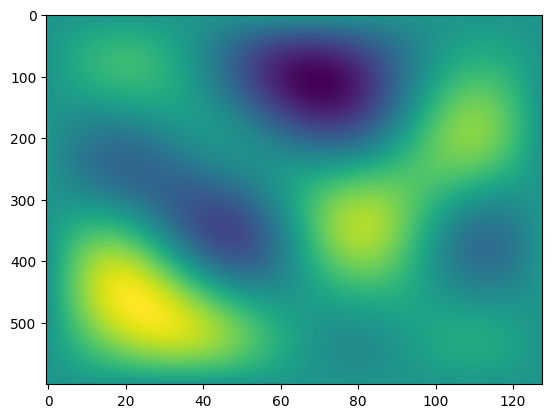

In [8]:
rand_f = gen_rand_f(period, 5, sigma, key)
rand_f = jit(rand_f)
rand_f = vmap(rand_f,  (0, None))
rand_f = vmap(rand_f,  (None, 0))

ff = rand_f(X, t_eval)
plt.imshow(ff, aspect='auto')
plt.show()

In [9]:

def gen_rand_f(period, K, sigma, key):
    def rand_f(x, y):
        px, py = period
        skey, akey = jax.random.split(key)
        r = jnp.arange(1,K)
        M = jnp.repeat(r, K-1)
        N = jnp.tile(r, K-1)
        W_s = jax.random.normal(skey, shape=(len(M),))
        W_c = jax.random.normal(akey, shape=(len(M),))
        sinM = jnp.sin(M*x*jnp.pi/px)
        sinN = jnp.sin(N*y*jnp.pi/py)*W_s
        cosM = 1j*jnp.cos(M*x*jnp.pi/px)
        cosN = jnp.cos(N*y*jnp.pi/py)*W_c
        f = jnp.dot(sinM, sinN)+jnp.dot(cosM, cosN)
        return f.real*sigma
    return rand_f


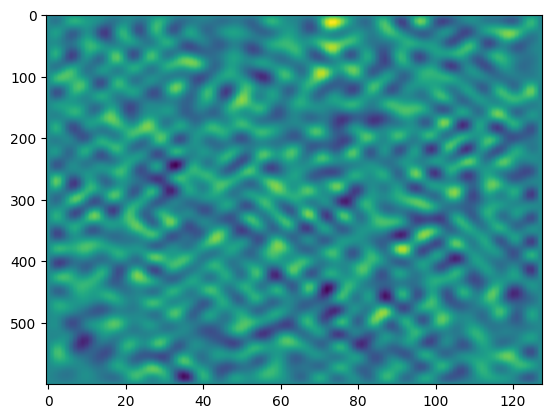

In [10]:
rand_f = gen_rand_f(period, 35, sigma, key)
rand_f = jit(rand_f)
rand_f = vmap(rand_f,  (0, None))
rand_f = vmap(rand_f,  (None, 0))

ff = rand_f(X, t_eval)
plt.imshow(ff, aspect='auto')
plt.show()

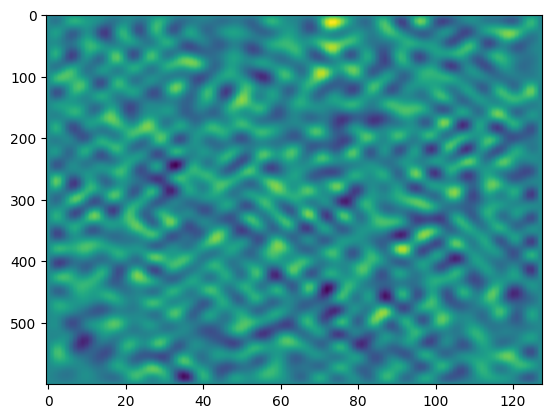

In [11]:
ff = rand_f(X, t_eval)
plt.imshow(ff, aspect='auto')
plt.show()